# 1. import the necessery libraries


In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers



2025-11-17 23:50:43.660433: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 23:50:43.717096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 23:50:44.990567: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# 2. load and split the data 

In [2]:
import os 
import numpy as np 
import pandas as pd 
import imageio 
import matplotlib.pyplot as plt 
%matplotlib inline 

path =''
# image_path = os.path.join(path,'../input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/')
# mask_path = os.path.join(path,'../input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/')
image_path = './data/semantic_drone_dataset/dataset/semantic_drone_dataset/original_images/'
mask_path = './data/semantic_drone_dataset/dataset/semantic_drone_dataset/label_images_semantic/'

image_list = sorted([
    f for f in os.listdir(image_path)
    if os.path.isfile(os.path.join(image_path, f))
    and not f.startswith('.')                         # ignore hidden
    and f.lower().endswith(('.jpg', '.jpeg', '.png')) # images
])

mask_list = sorted([
    f for f in os.listdir(mask_path)
    if os.path.isfile(os.path.join(mask_path, f))
    and not f.startswith('.')                         # ignore hidden, e.g. .ipynb_checkpoints
    and f.lower().endswith(('.png', '.jpg', '.jpeg')) # masks
])



# 2️⃣ Keep only filenames that have BOTH image and mask (match by ID = name without extension)
image_ids = {os.path.splitext(f)[0] for f in image_list}
mask_ids  = {os.path.splitext(f)[0] for f in mask_list}
common_ids = sorted(image_ids & mask_ids)

image_list = [f for f in image_list if os.path.splitext(f)[0] in common_ids]
mask_list  = [f for f in mask_list  if os.path.splitext(f)[0] in common_ids]



# 3️⃣ Optionally prepend full paths (if you want paths instead of just filenames)
image_list = [os.path.join(image_path, f) for f in image_list]
mask_list  = [os.path.join(mask_path,  f) for f in mask_list]


# image_list = sorted(image_list)
# mask_list = sorted(mask_list)

train_image_list = image_list[:390]
train_mask_list = mask_list[:390]

validation_image_list = image_list[390:400]
validation_mask_list = mask_list[390:400]

print(sorted(os.listdir(image_path))[:10])
print(sorted(os.listdir(mask_path))[:10])


print("number of train images is : {} ".format(len(train_image_list)))
print("number of train masks is : {} ".format(len(train_mask_list)))

print("number of train images is : {} ".format(len(validation_image_list)))
print("number of train masks is : {} ".format(len(validation_mask_list)))

print(image_list[0])
print(mask_list[0])

['.ipynb_checkpoints', '000.jpg', '001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '008.jpg', '011.jpg']
['.ipynb_checkpoints', '000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '008.png', '011.png']
number of train images is : 390 
number of train masks is : 390 
number of train images is : 10 
number of train masks is : 10 
./data/semantic_drone_dataset/dataset/semantic_drone_dataset/original_images/000.jpg
./data/semantic_drone_dataset/dataset/semantic_drone_dataset/label_images_semantic/000.png


# 3. explore some images :

/tmp/ipykernel_312415/4060607036.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img  = imageio.imread(train_image_list[n])


(4000, 6000, 3)
(4000, 6000)


/tmp/ipykernel_312415/4060607036.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(train_mask_list[n])


Text(0.5, 1.0, 'Mask')

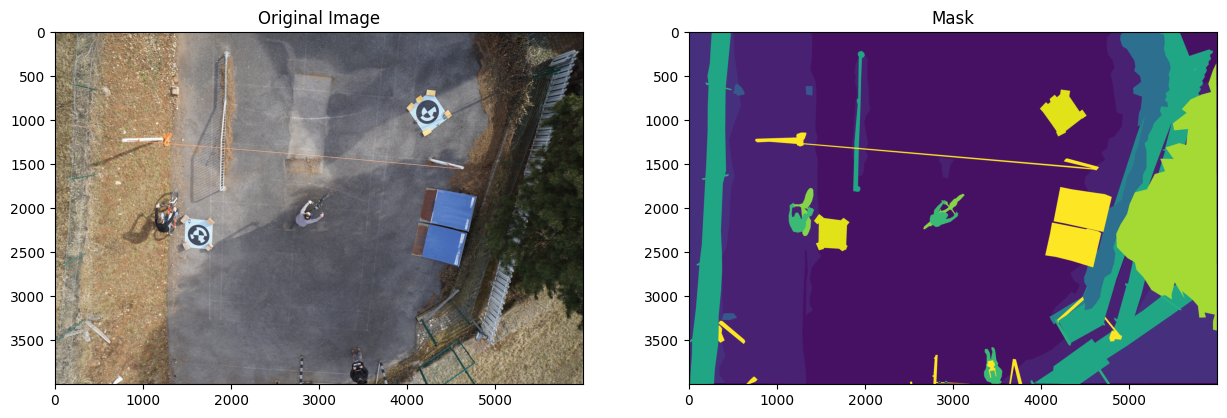

In [3]:
n = 10 # you can chose any index 
img  = imageio.imread(train_image_list[n])
print(img.shape)
mask = imageio.imread(train_mask_list[n])
print(mask.shape)

# now let's plot 
fig ,arr  = plt.subplots(1,2,figsize=(15,10))
arr[0].imshow(img)
arr[0].set_title('Original Image')
arr[1].imshow(mask)
arr[1].set_title('Mask')

In [4]:
train_images = tf.constant(train_image_list)
train_masks = tf.constant(train_mask_list)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_masks))
for image,mask in train_dataset.take(1) : 
    print(image)
    print(mask)
    
validation_images = tf.constant(validation_image_list)
validation_masks = tf.constant(validation_mask_list)

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images,validation_masks))
for image,mask in validation_dataset.take(1) : 
    print(image)
    print(mask)    

tf.Tensor(b'./data/semantic_drone_dataset/dataset/semantic_drone_dataset/original_images/000.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/semantic_drone_dataset/dataset/semantic_drone_dataset/label_images_semantic/000.png', shape=(), dtype=string)
tf.Tensor(b'./data/semantic_drone_dataset/dataset/semantic_drone_dataset/original_images/586.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/semantic_drone_dataset/dataset/semantic_drone_dataset/label_images_semantic/586.png', shape=(), dtype=string)


I0000 00:00:1763423457.043900  312415 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 726 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:18:00.0, compute capability: 7.5
I0000 00:00:1763423457.045585  312415 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6090 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:3b:00.0, compute capability: 7.5
2025-11-17 23:50:57.107899: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-17 23:50:57.123678: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 4. preprocessing our data

In [5]:
def process_path(image_path,mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32) #this do the same as dividing by 255 to set the values between 0 and 1 (normalization)
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask,channels=3)
    mask = tf.math.reduce_max(mask,axis=-1,keepdims=True)
    return img , mask

def preprocess(image,mask) : 
    input_image = tf.image.resize(image,(96,128),method='nearest')
    input_mask = tf.image.resize(mask,(96,128),method='nearest')
    
    return input_image , input_mask

train_image_ds = train_dataset.map(process_path) # apply the preprocces_path function to our train_dataset
print(train_image_ds)
train_processed_image_ds = train_image_ds.map(preprocess) # apply the preprocess function to our train_dataset

validation_image_ds = validation_dataset.map(process_path) # apply the preprocces_path function to our validation_dataset
print(validation_image_ds)
validation_processed_image_ds = validation_image_ds.map(preprocess) 


<_MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>


# 5.  Define The Conv Block For The Contracting Path


In [6]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    conv = Conv2D(n_filters, 
                  kernel_size = 3,     
                  activation='relu',
                  padding='same',
                  kernel_initializer=tf.keras.initializers.HeNormal())(inputs)
    conv = Conv2D(n_filters, 
                  kernel_size = 3, 
                  activation='relu',
                  padding='same',
                  kernel_initializer=tf.keras.initializers.HeNormal())(conv)
   
    

    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
        
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

# 6. Define the upsampling block for the expanding path

In [7]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    
    up = Conv2DTranspose(
                 n_filters,  
                 kernel_size = 3,
                 strides=(2,2),
                 padding='same')(expansive_input)
    
    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,  
                 kernel_size = 3,   
                 activation='relu',
                 padding='same',
                 kernel_initializer=tf.keras.initializers.HeNormal())(merge)
    conv = Conv2D(n_filters,  
                 kernel_size = 3,  
                 activation='relu',
                 padding='same',
                 kernel_initializer=tf.keras.initializers.HeNormal())(conv)
    
    
    return conv

# 7. Finally! ,  we will Define the unet model 
## which composes of a set of conv blocks and upsampling blocks

In [8]:
def unet_model(input_size=(96, 128, 3), n_filters=32, n_classes=23):
    
    inputs = Input(input_size)
    
    # contracting path
    cblock1 = conv_block(inputs, n_filters, dropout_prob=0.4)
    cblock2 = conv_block(cblock1[0], 2*n_filters, dropout_prob=0.4)
    cblock3 = conv_block(cblock2[0], 4*n_filters, dropout_prob=0.4)
    cblock4 = conv_block(cblock3[0], 8*n_filters, dropout_prob=0.45) 
    cblock5 = conv_block(cblock4[0],16*n_filters, dropout_prob=0.4, max_pooling=None)     
    
    # expanding path
    ublock6 = upsampling_block(cblock5[0], cblock4[1],  8 * n_filters)
    ublock7 = upsampling_block(ublock6, cblock3[1],  n_filters*4)
    ublock8 = upsampling_block(ublock7,cblock2[1] , n_filters*2)
    ublock9 = upsampling_block(ublock8,cblock1[1],  n_filters)

    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)
    
    conv10 = Conv2D(n_classes, kernel_size=1, padding='same')(conv9)  
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [9]:
img_height = 96
img_width = 128
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

# 8. Our model is ready !!

In [10]:
unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 128,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 96, 128,   │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 96, 128,   │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 96, 128,   │          0 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 48, 64,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 48, 64,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 48, 64,    │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 48, 64,    │          0 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 24, 32,    │          0 │ dropout_1[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 24, 32,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 32,    │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 24, 32,    │          0 │ conv2d_5[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 12, 16,    │          0 │ dropout_2[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 12, 16,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 12, 16,    │    590,080 │ conv2d_6[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 12, 16,    │          0 │ conv2d_7[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 6, 8, 256) │          0 │ dropout_3[0][0] 

 Total params: 8,640,471 (32.96 MB)

 Trainable params: 8,640,471 (32.96 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
EPOCHS = 500
VAL_SUBSPLITS = 5
BUFFER_SIZE = 390
BATCH_SIZE = 4

# train
train_processed_image_ds.batch(BATCH_SIZE)
train_dataset = train_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_processed_image_ds.element_spec)

# validation
validation_processed_image_ds.batch(BATCH_SIZE)
validation_dataset = validation_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(validation_processed_image_ds.element_spec)
 

model_history = unet.fit(train_dataset, epochs=EPOCHS)

(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
Epoch 1/500


2025-11-17 23:51:25.275123: I external/local_xla/xla/service/service.cc:163] XLA service 0x7df4ec004e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-17 23:51:25.275152: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Quadro RTX 4000, Compute Capability 7.5
2025-11-17 23:51:25.275159: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (1): Quadro RTX 4000, Compute Capability 7.5
2025-11-17 23:51:25.402218: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-17 23:51:25.735542: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2025-11-17 23:51:26.203362: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91

 5/98 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1763 - loss: 3.4529

I0000 00:00:1763423495.457969  312720 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3738 - loss: 2.5045

2025-11-17 23:51:38.231911: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2025-11-17 23:51:39.293649: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[2,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,64,24,32]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-17 23:51:39.338819: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm e

98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - accuracy: 0.4262 - loss: 2.1909
Epoch 2/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5231 - loss: 1.7710
Epoch 3/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5540 - loss: 1.5720
Epoch 4/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5624 - loss: 1.4630
Epoch 5/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5874 - loss: 1.3791
Epoch 6/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5985 - loss: 1.3346
Epoch 7/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6044 - loss: 1.2955
Epoch 8/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6280 - loss: 1.2428
Epoch 9/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6360 - loss: 1.2013
Epoch 10/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6448 - loss: 1.1823
Epoch 11/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6297 - loss: 1.2150
Epoch 12/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accurac

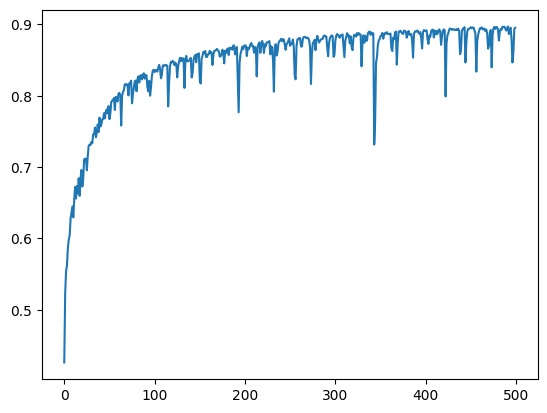

In [13]:
plt.plot(model_history.history["accuracy"])

In [14]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [15]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [16]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

----- training_dataset results---------


2025-11-18 00:13:04.011570: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[4,32,96,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,96,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-18 00:13:04.076148: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[4,32,96,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,32,96,128]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cud

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


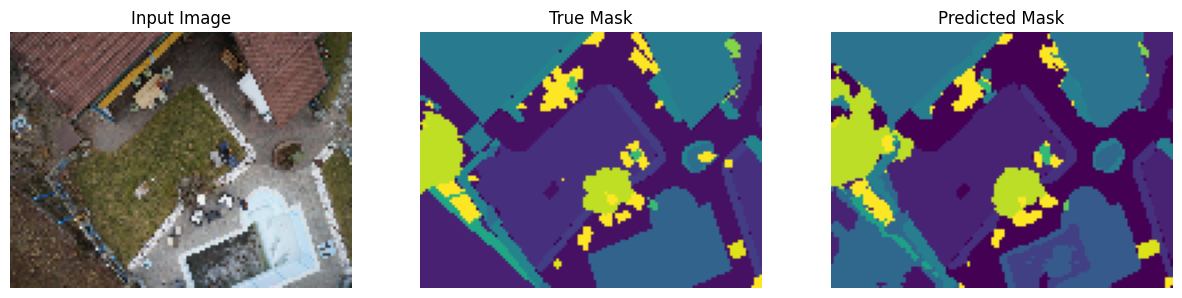

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


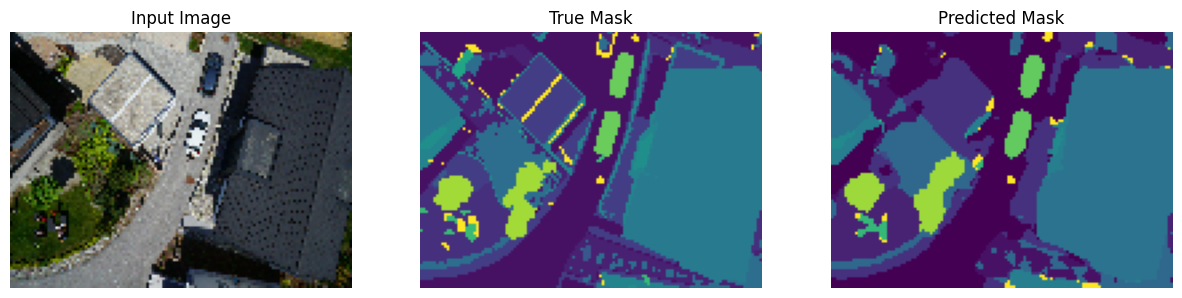

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


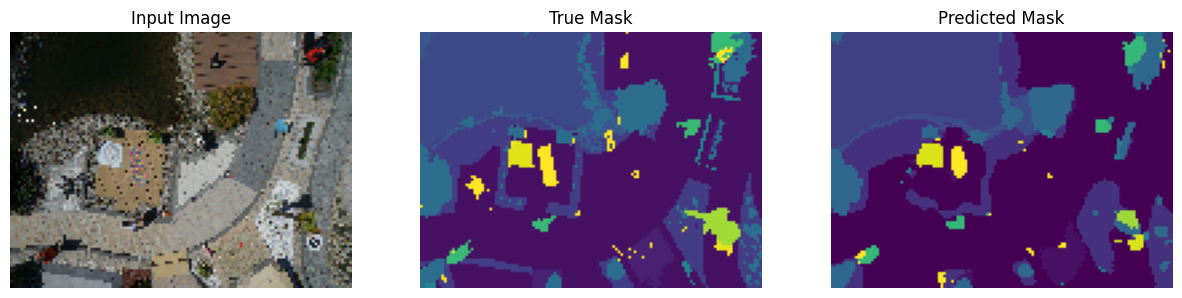

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


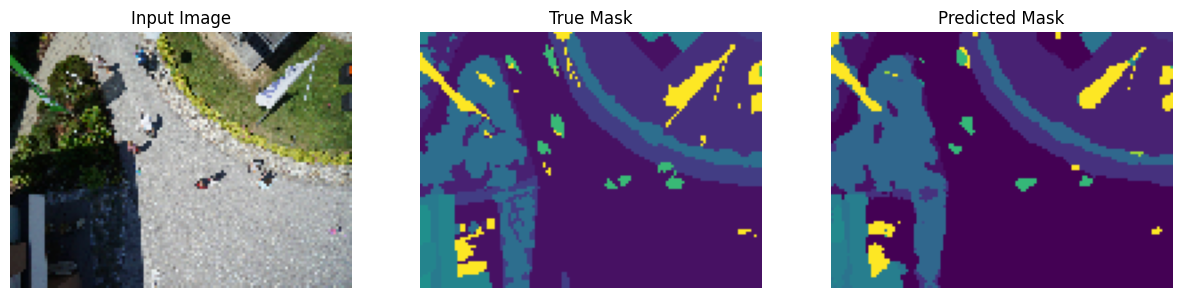

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


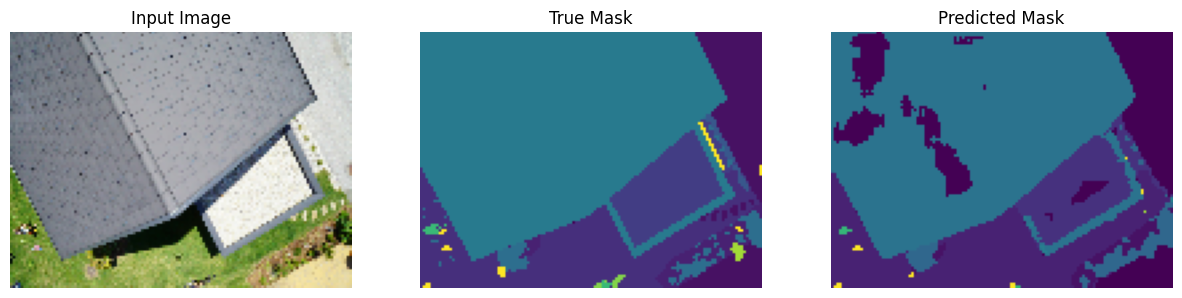

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


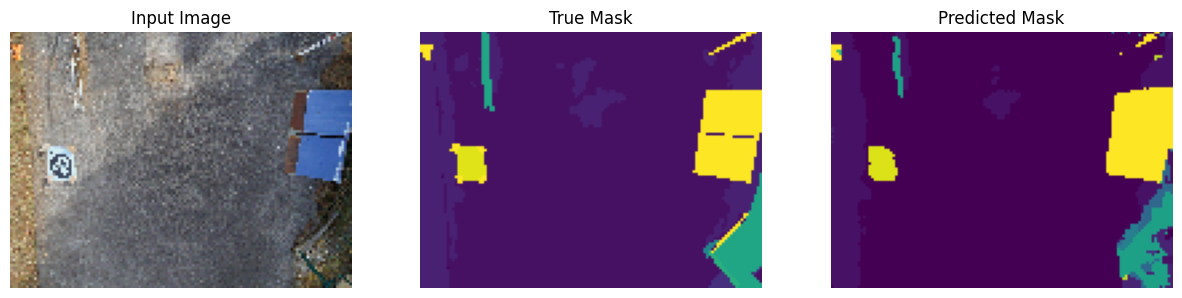

----- validation_dataset results---------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


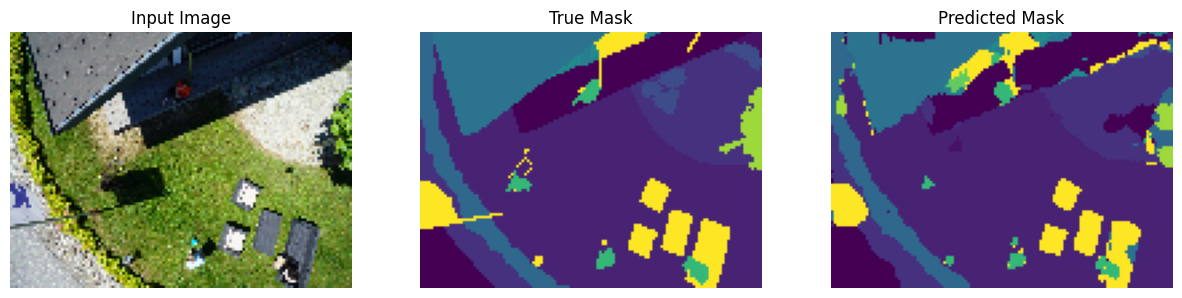

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


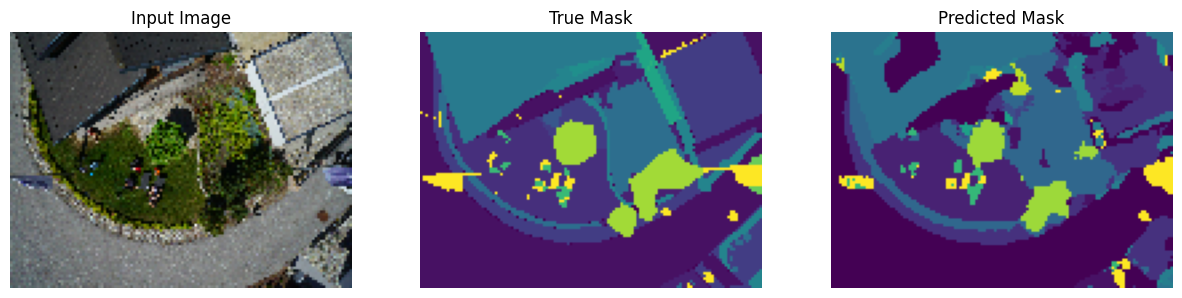

2025-11-18 00:13:08.408216: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[2,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,64,24,32]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-18 00:13:08.454704: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[2,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,128,24,32]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target=

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


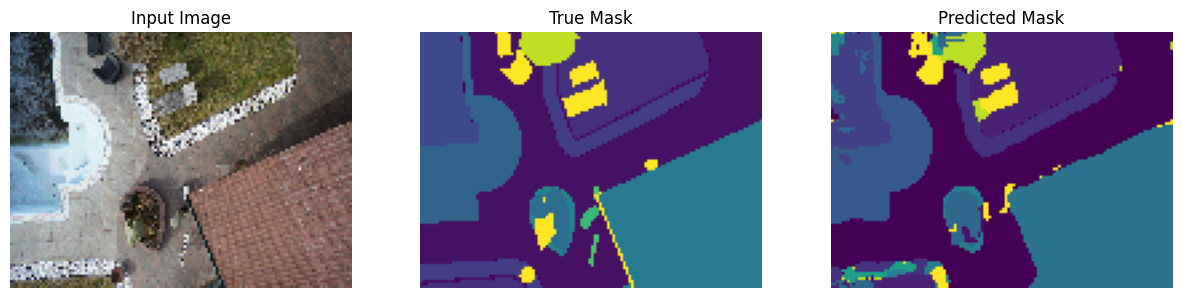

2025-11-18 00:13:09.421645: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
print("----- training_dataset results---------")
show_predictions(train_dataset, 6)
print("----- validation_dataset results---------")
show_predictions(validation_dataset, 6)

In [18]:
# model evaluation
print("Unet Model Evaluation: ")
unet.evaluate(validation_dataset)

Unet Model Evaluation: 


2025-11-18 00:13:18.008758: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8299 - loss: 0.5704

2025-11-18 00:13:18.777466: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.8688 - loss: 0.4348


[0.43475142121315, 0.8688313364982605]